<a href="https://colab.research.google.com/github/bdfd/Portfolio_Project09_Loan_Status/blob/main/Loan_Status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Status

## Basic Approach

The Approach
1. Perform some quick EDA(Exploratory Data Analysis)
2. Use Scikit-Learn Classification Algorithm
3. Covert data into an array
4. Converting the target variable into serveral Classification Algorithms

Classification Model:
  *   1. K Nearest Neighbor(KNN)
  *   2. Decision Tree
  *   3. Support Vector Machine
  *   4. Logistic Regression
Target Cluster Datasets is about a set of data regarding about pass loans. 
The dataset includes details of 346 customers with following fields.  


| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off/on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
# import itertools
import matplotlib.pyplot as plt
# from matplotlib.ticker import NullFormatter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
data_path = 'https://raw.githubusercontent.com/bdfd/Portfolio_Project09_Loan_Status/main/dataset/Loan%20Status.csv'
# upload dataset into data frame
df = pd.read_csv(data_path)
df.head(3)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male


In [3]:
df.describe()
df.shape

(346, 10)

In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## Data Visualization and Pre-Processing

In [5]:
# df['loan_status'].value_counts()
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

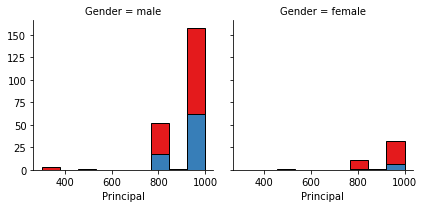

In [6]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col='Gender', hue='loan_status', palette='Set1', col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec='k')

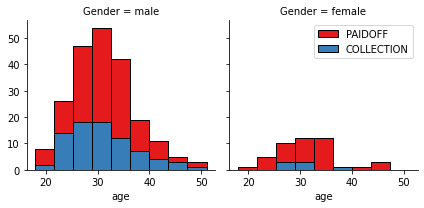

In [7]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col='Gender', hue='loan_status', palette='Set1', col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec='k')

g.axes[-1].legend()
plt.show()

## Feature Selection / Extraction

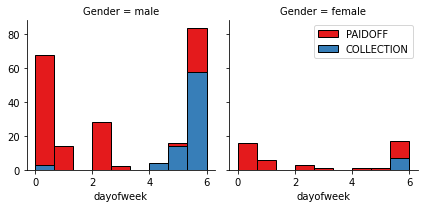

In [8]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col='Gender', hue='loan_status', palette='Set1', col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec='k')
g.axes[-1].legend()
plt.show()

In [9]:
df['weekend'] = df['dayofweek'].apply(lambda x:1 if(x>3) else 0)
df.head(3)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0


## Convert Categorical Features to Numerical Values

In [10]:
df.groupby(['Gender','education'])['loan_status'].value_counts(normalize=True)

Gender  education             loan_status
female  Bechalor              PAIDOFF        1.000000
        High School or Below  PAIDOFF        0.800000
                              COLLECTION     0.200000
        college               PAIDOFF        0.863636
                              COLLECTION     0.136364
male    Bechalor              PAIDOFF        0.676471
                              COLLECTION     0.323529
        High School or Below  PAIDOFF        0.732824
                              COLLECTION     0.267176
        Master or Above       COLLECTION     0.500000
                              PAIDOFF        0.500000
        college               PAIDOFF        0.748031
                              COLLECTION     0.251969
Name: loan_status, dtype: float64

86% of female pay their loans while only 73% of males pay their loan

In [11]:
df.groupby(['education'])['loan_status'].value_counts()

education             loan_status
Bechalor              PAIDOFF         33
                      COLLECTION      11
High School or Below  PAIDOFF        112
                      COLLECTION      39
Master or Above       COLLECTION       1
                      PAIDOFF          1
college               PAIDOFF        114
                      COLLECTION      35
Name: loan_status, dtype: int64

In [12]:
Feature = df[['Principal','terms','age','Gender','education']]

In [13]:
Feature.head(3)

,Principal,terms,age,Gender,education
0,1000,30,45,male,High School or Below
1,1000,30,33,female,Bechalor
2,1000,15,27,male,college


In [14]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=3)
# df_train.to_csv('train.csv')
# df_test.to_csv('test.csv')

In [15]:
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above','education'], axis=1, inplace=True)
Feature.head(3)

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,male,0,1,0
1,1000,30,33,female,1,0,0
2,1000,15,27,male,0,0,1


In [16]:
X = Feature
y = df['loan_status'].values

In [17]:
Feature['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
Feature = preprocessing.StandardScaler().fit(Feature).transform(Feature)

In [18]:
Feature

array([[ 0.51578458,  0.92071769,  2.33152555, ..., -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ...,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.38170062,
        -0.87997669,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.38170062,
        -0.87997669,  1.14984679]])

## Classification - K Nearest Neighbor(KNN)

In [19]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [20]:
print('Train Set:', X_train.shape, y_train.shape)
print('Test Set:', X_test.shape, y_test.shape)

Train Set: (242, 7) (242, 1)
Test Set: (104, 7) (104, 1)


In [21]:
# X_train.to_csv('train_x.csv')
# X_test.to_csv('test_x.csv')
# y_train.to_csv('train_y.csv')
# y_test.to_csv('test_y.csv')

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [23]:
# need to transfer y_train and y_test back to np.array in order to predict KNN
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [31]:
Ks = 10 
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1, Ks):
  #Train Model and Predict
  neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
  y_hat = neigh.predict(X_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)
  std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
print(mean_acc,std_acc)

[0.58653846 0.50961538 0.68269231 0.60576923 0.71153846 0.69230769
 0.74038462 0.71153846 0.72115385] [0.04800409 0.04889474 0.04555299 0.04710533 0.04458414 0.04536994
 0.0439365  0.04458414 0.04437394]


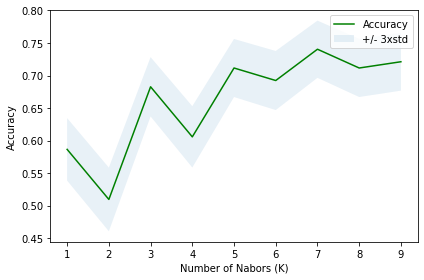

In [32]:
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc -1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [34]:
k = 7
# Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh
y_hat = neigh.predict(X_test)

In [35]:
print('Train Set Accuracy:', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test Set Accuracy:', metrics.accuracy_score(y_test, y_hat))

Train Set Accuracy: 0.7727272727272727
Test Set Accuracy: 0.7403846153846154
